# COSC4300 Artificial Intelligence Practical Project

### Student Performances Dataset Analysis & applying 2 machine learning algorithms (LR and ANN)

#### Done by: Beylasan Al Ruzaiqi (20201888)                                        

Dataset Link: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###### Part One: Exploratory Dataset Analysis

In [2]:
#Read dataset into a dataframe
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
#First 5 rows of the datset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#Last 5 rows of the datset
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
#Examine summary statistics of the data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
#Check for any missing data
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
#Get information about the data present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#Get stattistics of the columns present in the dataframe
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
#Adding a 'final grade' column
df['final grade'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

In [10]:
#Create a 'completed' column for the students who completed their test preparation course based on several factors
completed = df['test preparation course'] == 'completed'
df_completed = df[completed][['gender', 'race/ethnicity', 'parental level of education']]

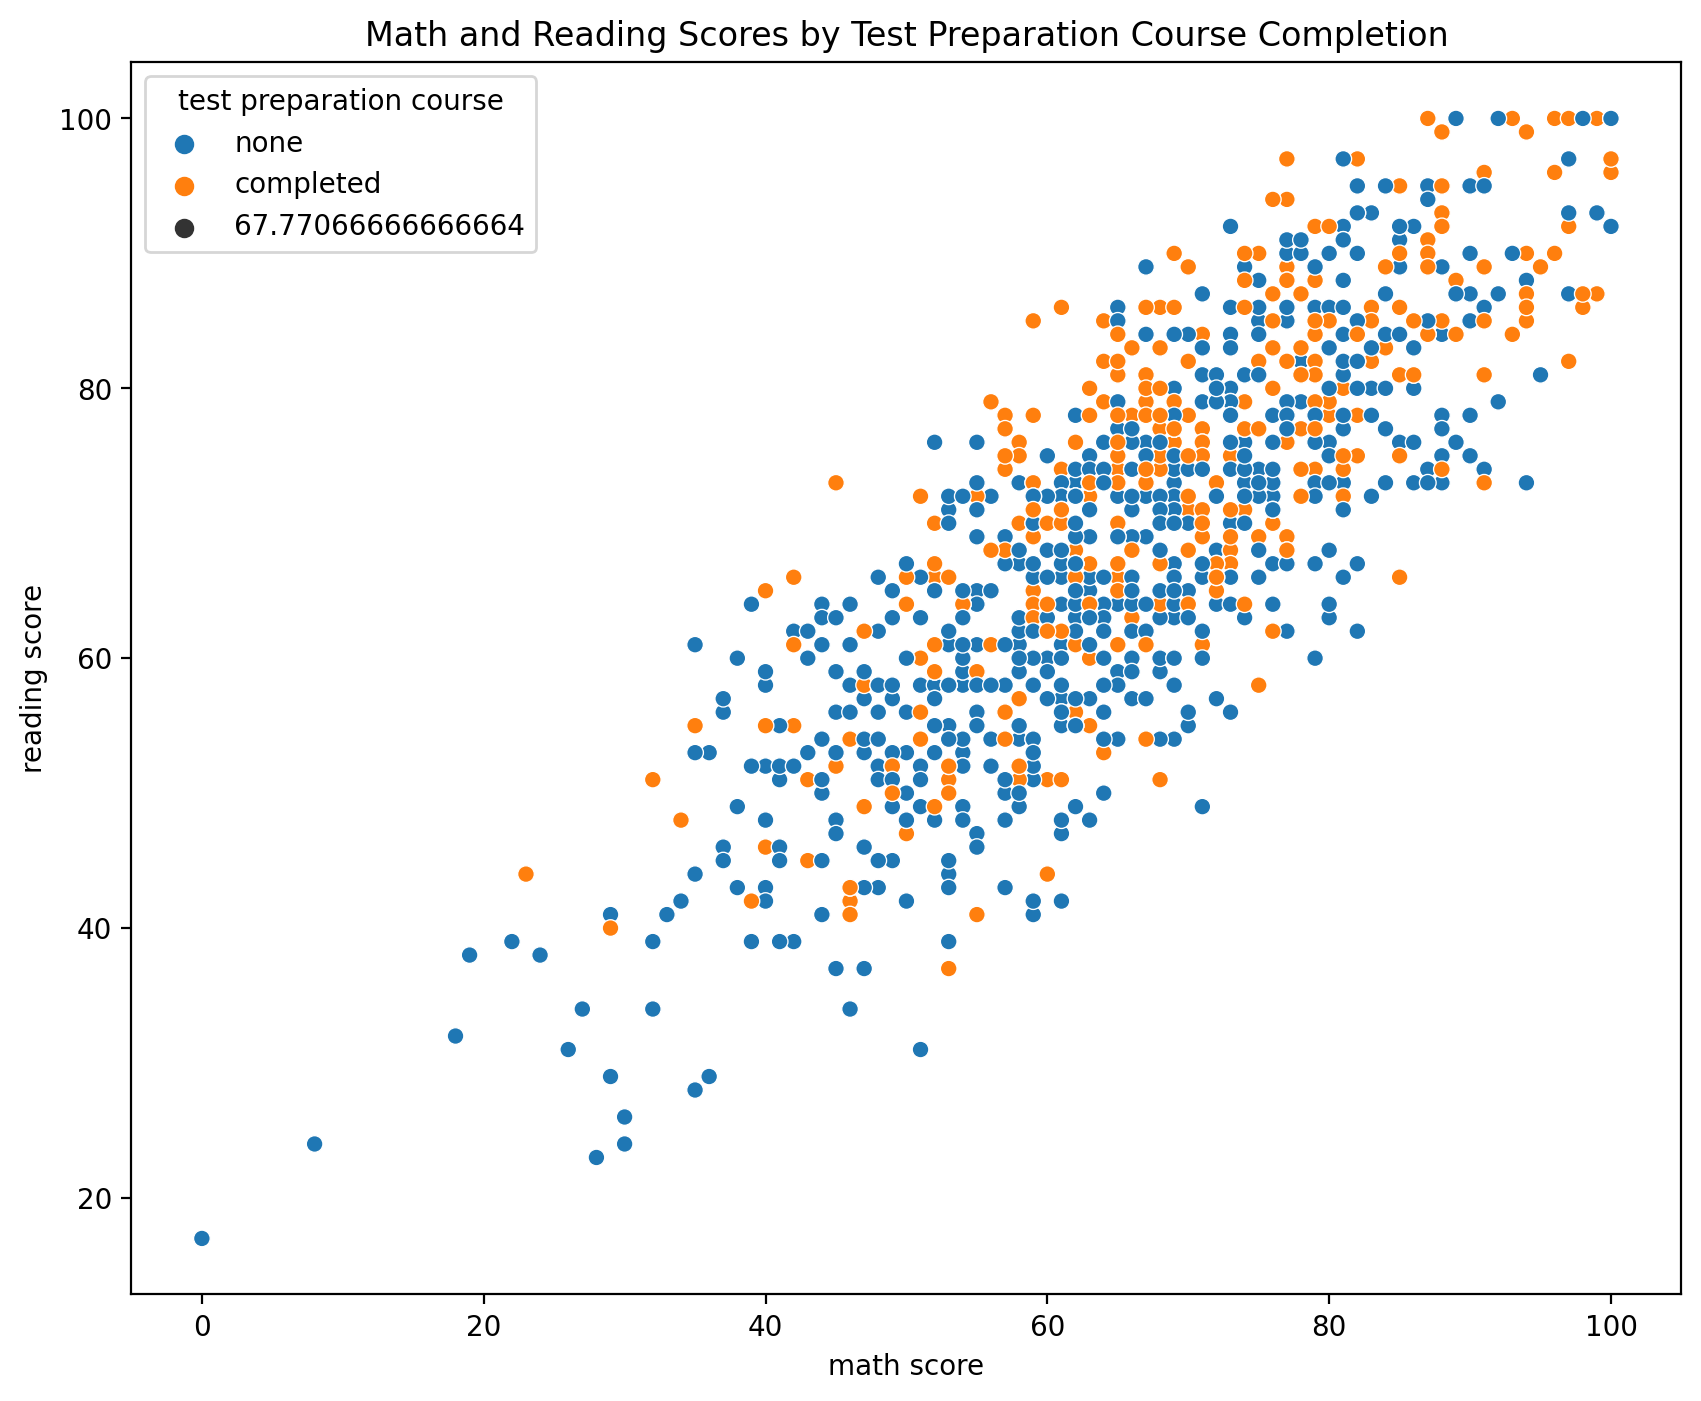

In [11]:
#Scatterplot to visualize the math and reading scores based on who completed their test preparation course 
#and taking the mean of the final grade
plt.figure(figsize=(10,8), dpi=200)
sns.scatterplot(x='math score', y='reading score', data=df, hue='test preparation course',style=np.mean(df['final grade']))
plt.title('Math and Reading Scores by Test Preparation Course Completion')
plt.show()

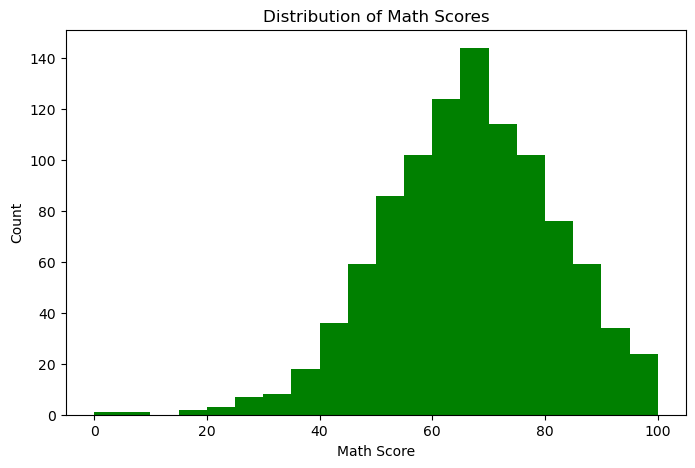

In [12]:
#Visualize the distribution of each numerical variable in the dataset
plt.figure(figsize=(8,5))
math_scores = df['math score']
plt.hist(math_scores, bins=20, color='green')
plt.xlabel('Math Score')
plt.ylabel('Count')
plt.title('Distribution of Math Scores')
plt.show()

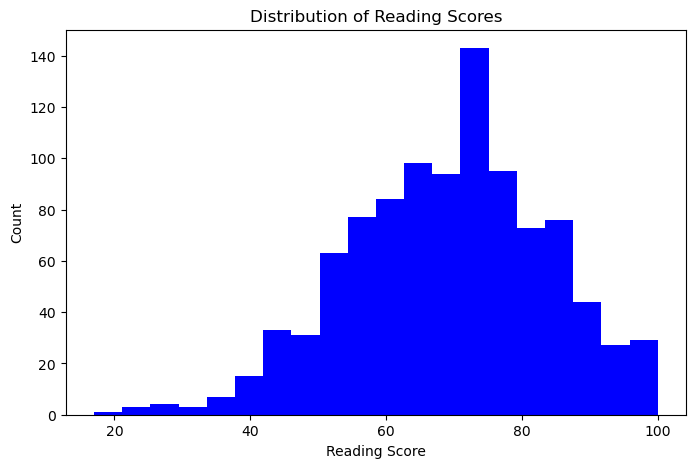

In [13]:
plt.figure(figsize=(8,5))
math_scores = df['reading score']
plt.hist(math_scores, bins=20, color='blue')
plt.xlabel('Reading Score')
plt.ylabel('Count')
plt.title('Distribution of Reading Scores')
plt.show()

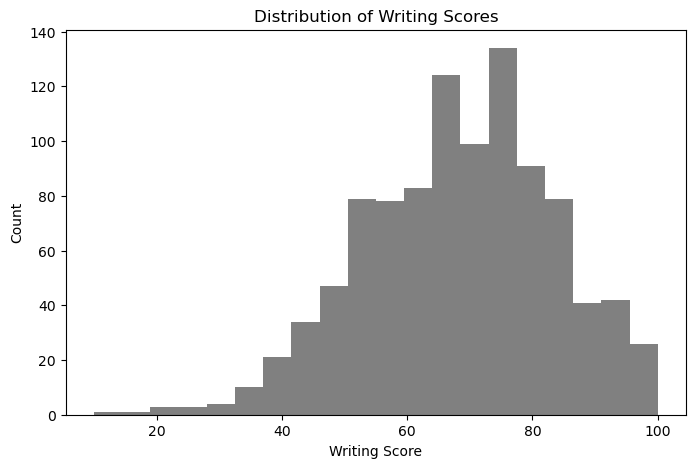

In [14]:
plt.figure(figsize=(8,5))
math_scores = df['writing score']
plt.hist(math_scores, bins=20, color='gray')
plt.xlabel('Writing Score')
plt.ylabel('Count')
plt.title('Distribution of Writing Scores')
plt.show()

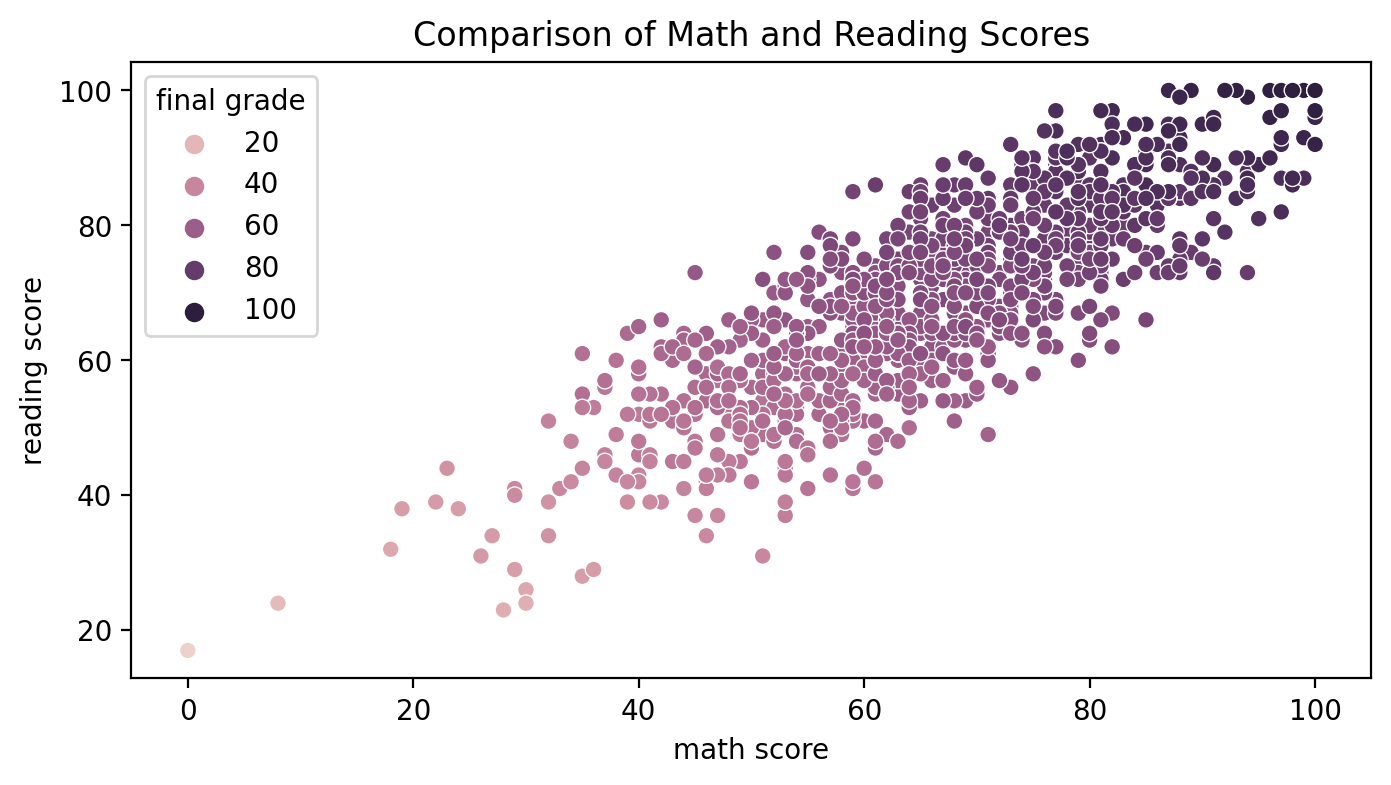

In [15]:
#Scatterplot to visualize the math and reading scores in comparison with the final grade
plt.figure(figsize=(8,4),dpi=200)
sns.scatterplot(x='math score', y='reading score',data=df,hue='final grade')
plt.title("Comparison of Math and Reading Scores")
plt.show()

In [16]:
#Create a correlation upper triangle matrix
correlation_mat = df.corr()

<Axes: >

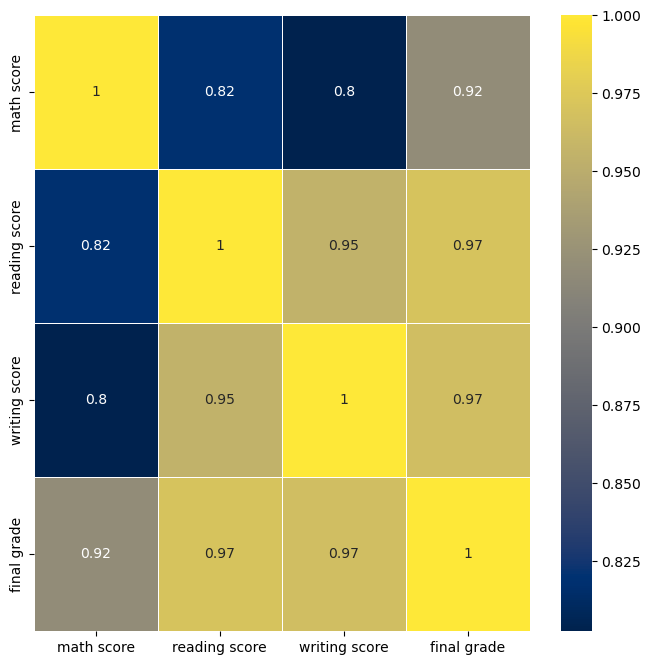

In [17]:
#Heatmap with the correlating matrix of information
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
sns.heatmap(correlation_mat,linewidths = 0.5,cmap='cividis',annot = True)

###### Part Two: Applying two machine learning models and their techniques into the dataset
###### Model 1: Linear Regression

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
#Preparing the data
X = df[['math score', 'reading score', 'writing score']]     # predictor variables
y = df['final grade']     # target variable

In [20]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,final grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [21]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#Creating a Linear Regression model and fitting it on the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
#Evaluating the model and calculating the R-squared and RMSE values
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [24]:
#list of predictions
y_pred

array([87.        , 64.        , 75.        , 74.66666667, 81.66666667,
       78.        , 67.33333333, 59.        , 77.33333333, 48.66666667,
       47.        , 26.        , 76.        , 58.33333333, 83.66666667,
       75.        , 49.        , 48.33333333, 53.33333333, 61.33333333,
       73.33333333, 49.33333333, 62.66666667, 44.        , 79.33333333,
       77.33333333, 72.        , 50.        , 41.        , 55.66666667,
       60.        , 67.        , 60.33333333, 73.        , 77.33333333,
       51.        , 76.        , 74.33333333, 75.        ,  9.        ,
       78.        , 64.33333333, 65.33333333, 61.33333333, 84.        ,
       65.66666667, 71.        , 29.33333333, 86.33333333, 78.66666667,
       72.        , 71.33333333, 78.66666667, 54.        , 71.66666667,
       72.33333333, 83.        , 54.66666667, 81.66666667, 89.        ,
       43.33333333, 80.66666667, 79.        , 61.66666667, 87.66666667,
       73.66666667, 65.        , 54.66666667, 64.66666667, 88.66

In [25]:
#Displaying the R-squared and Root mean squared error values of the model
print("R-squared value of the model is: ", r2)
print("Root Mean Squared Error of the model is: ", rmse)

R-squared value of the model is:  1.0
Root Mean Squared Error of the model is:  1.9452932329973273e-14


In [26]:
#Optimising parameters into hyperparameters
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV

In [27]:
#Creating an intsance of a the Ridge Regression model
model = Ridge()

#Defining the hyperparameters to be tuned
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [28]:
#Using GridSearchCV to find the best hyperparameters in the ridge regression model
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [29]:
#Finding and printing the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters for the model: ", best_params)

Best hyperparameters for the model:  {'alpha': 0.001}


In [30]:
#Evaluating the model and calculating the R-squared value and RMSE of the optimized model
y_pred = grid_search.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [31]:
#Displaying the R-squared and RMSE values of the optimized model
print("R-squared value of the model is: ", r2)
print("Root Mean Squared Error of the model is: ", rmse)

R-squared value of the model is:  1.0
Root Mean Squared Error of the model is:  3.1371323370271053e-08


##### Model 2: ANN (Artificial Neural Network)

In [32]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [33]:
#Preparing the data
X = df[['math score', 'reading score', 'writing score']]     # predictor variables
y = df['final grade']     # target variable

In [34]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,final grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [35]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from keras.models import Sequential
from keras.layers import Dense

In [37]:
#Creating the model
model2 = Sequential()
model2.add(Dense(16, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='linear'))

In [38]:
#Compile the model
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [39]:
#Train and fit the model
history = model2.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 2715.5471 - mean_absolute_error: 50.7946 - mean_squared_error: 2715.5471
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 1213.0743 - mean_absolute_error: 33.8030 - mean_squared_error: 1213.0743
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 440.3016 - mean_absolute_error: 20.1987 - mean_squared_error: 440.3016
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 89.3416 - mean_absolute_error: 8.8304 - mean_squared_error: 89.3416
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 6.6424 - mean_absolute_error: 2.1426 - mean_squared_error: 6.6424
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4768 - mean_absolute_error: 0.5613 - mean_squared_error: 0.4768
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4657 - mean_absolute_error: 0.5611 - mean_squared_error: 0.4657
Epoch 

In [40]:
#Model Summary
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 16)                  64        
                                                                 
 dense_1 (Dense)             (32, 8)                   136       
                                                                 
 dense_2 (Dense)             (32, 1)                   9         
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [41]:
loss = model2.history.history['loss']

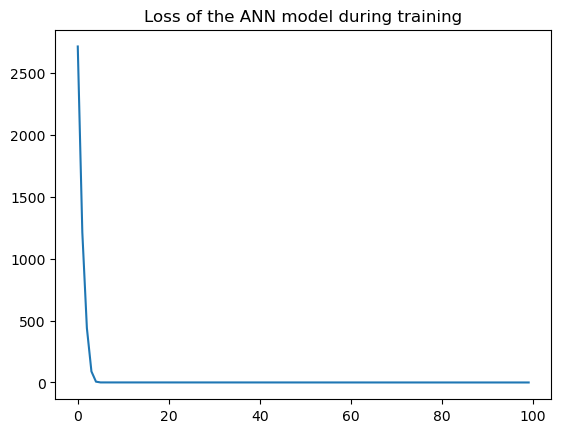

In [42]:
#Plotting the loss of the model during training (for each epoch)
sns.lineplot(x=range(len(loss)), y=loss)
plt.title("Loss of the ANN model during training")
plt.show()

In [43]:
#Get the test predictions
from sklearn.metrics import mean_absolute_error, mean_squared_error
test_predictions = model2.predict(X_test)

7/7 [==============================] - 0s 667us/step


In [44]:
#Displaying the test predictions based on the model
print(test_predictions)

[[86.66844 ]
 [64.34643 ]
 [74.68113 ]
 [74.58729 ]
 [81.4376  ]
 [77.73316 ]
 [67.20537 ]
 [59.150364]
 [76.81629 ]
 [48.62076 ]
 [47.082806]
 [25.96186 ]
 [76.23104 ]
 [58.67832 ]
 [83.43656 ]
 [75.26526 ]
 [48.875072]
 [48.07631 ]
 [53.541325]
 [61.49671 ]
 [73.0026  ]
 [49.575504]
 [63.32211 ]
 [44.37997 ]
 [79.16444 ]
 [77.086525]
 [72.05275 ]
 [50.424984]
 [41.34334 ]
 [55.89601 ]
 [59.88249 ]
 [66.72703 ]
 [60.23822 ]
 [72.763695]
 [76.9543  ]
 [51.22451 ]
 [75.85103 ]
 [74.42862 ]
 [74.97256 ]
 [ 9.743558]
 [77.69657 ]
 [64.24897 ]
 [65.16532 ]
 [61.55576 ]
 [83.637596]
 [65.81377 ]
 [70.78015 ]
 [29.435745]
 [86.07252 ]
 [78.68534 ]
 [71.95004 ]
 [71.53001 ]
 [78.51781 ]
 [54.210423]
 [71.66749 ]
 [72.35778 ]
 [82.6224  ]
 [54.51364 ]
 [81.34196 ]
 [88.96588 ]
 [43.246136]
 [80.895485]
 [78.77212 ]
 [61.736897]
 [87.62897 ]
 [73.833984]
 [65.33338 ]
 [54.46999 ]
 [64.82552 ]
 [88.76934 ]
 [64.19121 ]
 [86.36523 ]
 [56.242874]
 [50.520626]
 [59.838837]
 [76.520134]
 [89.62086 ]

In [45]:
#Finding and displaying the MAE and MSE Values
mae = mean_absolute_error(y_test, test_predictions)
print("Mean absolute error is: ",mae)
mse = mean_squared_error(y_test, test_predictions)
print("Mean squared error is: ",mse)

Mean absolute error is:  0.20903298536936427
Mean squared error is:  0.06315271420692564


##### Comparing the two models based on MSE value

In [46]:
#Comparing the MSE values of both models
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error of model 1 (LR): ",mse)
mse2 = mean_squared_error(y_test, test_predictions)
print("Mean squared error of model 2 (ANN) is: ",mse2)

Mean squared error of model 1 (LR):  9.841599300021146e-16
Mean squared error of model 2 (ANN) is:  0.06315271420692564
